<a href="https://colab.research.google.com/github/safira123-pixel/PCVK_Genap_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah tingkat kecerahan citra 
 -------------------------------- 
Masukkan nilai kecerahan : 50


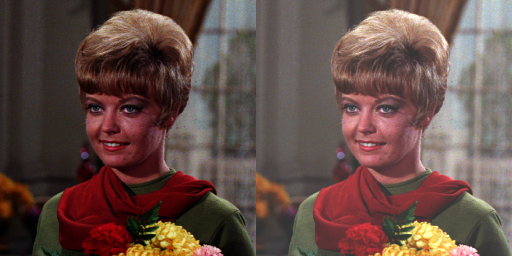

In [10]:
print(' Mengubah tingkat kecerahan citra ')
print(' -------------------------------- ')
try: 
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
    print('Erorr, not a number')
  
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simpel tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Tugas Praktikum

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori

 Mengubah inverse citra 
 -------------------------------- 


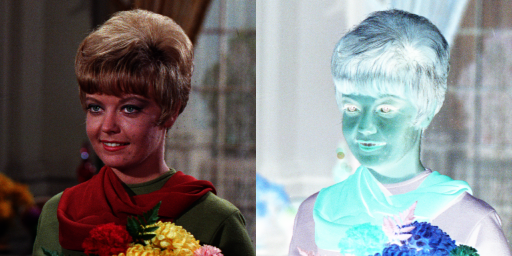

In [14]:
print(' Mengubah inverse citra ')
print(' -------------------------------- ')
# try: 
#   brightness = int(input('Masukkan nilai kecerahan : '))
# except ValueError:
#     print('Erorr, not a number')
  
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
inverse_image = np.zeros(original.shape, original.dtype)

#Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      inverse_image[y,x,c] = np.clip(255-original[y,x,c], 0, 255)

#cara simpel tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, inverse_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras

 Mengubah Contrast citra 
 -------------------------------- 
Masukkan nilai kecerahan : 50
Masukkan nilai contrast : 2


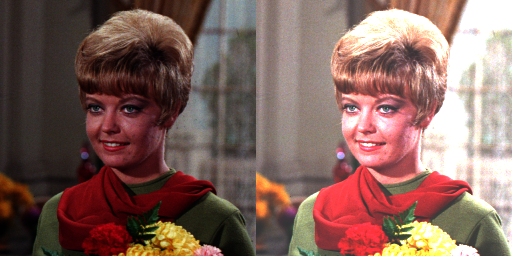

In [12]:
print(' Mengubah Contrast citra ')
print(' -------------------------------- ')
try: 
  brightness = int(input('Masukkan nilai kecerahan : '))
  contrast = int(input('Masukkan nilai contrast : '))
except ValueError:
    print('Erorr, not a number')
  
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

#Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log

 Mengubah Tingkat Kecerahan citra dengan Log
 -------------------------------- 
Masukkan nilai kecerahan : 50


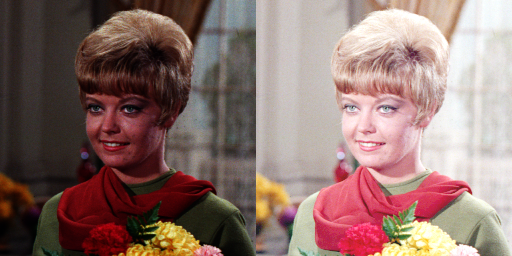

In [18]:
print(' Mengubah Tingkat Kecerahan citra dengan Log')
print(' -------------------------------- ')
try: 
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
    print('Erorr, not a number')
  
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1+original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori

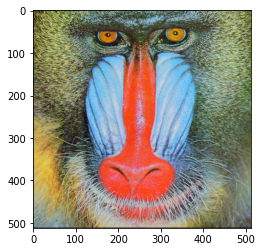

In [22]:
img_m = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
img_rgb = cv.cvtColor(img_m,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

1. Averaging

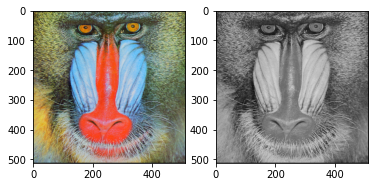

In [23]:
img_avg = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

2. Lightness

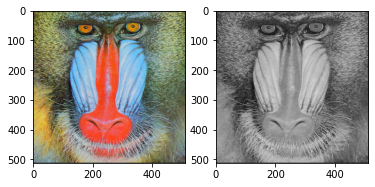

In [24]:
img_light = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
img_light[:] = np.max(img_light,axis=-1,keepdims=10)/2+np.min(img_light,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

3. Luminance

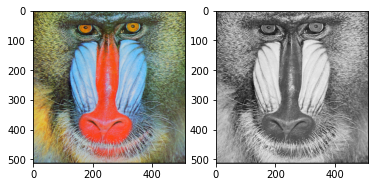

In [25]:
image_lum = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
R, G, B = image_lum[:,:,0], image_lum[:,:,1], image_lum[:,:,2]
gray_image_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_image_lum, cmap='gray')

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale

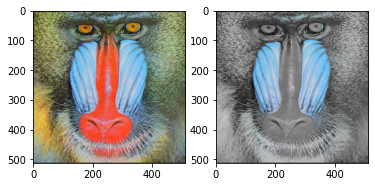

In [31]:

img_4 = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
ret, mask = cv.threshold(img_4[:,:,0], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_4)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_4, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')